In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df_columns = ['rainfall_min', 'rainfall_max', 'rainfall_mean', 'rainfall_median', 'rainfall_std']

In [72]:
def outlier(col):
    plt.figure()
    ax = plt.gca()
    ax.boxplot(col)
    ax.set_ylabel('Value')

def detect_outliers(data):
    # 1분위수, 3분위수, IQR 계산
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # 이상치 경계 설정
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치 식별
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

In [73]:
df_visitor = pd.read_csv("assets/output/visitors.csv")

In [74]:
df_visitor['visitor'] = df_visitor['visitor'].str.replace(',', '')

In [75]:
df_visitor['visitor'] = df_visitor['visitor'].astype(int)

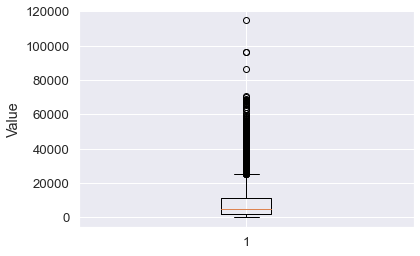

In [76]:
outlier(df_visitor['visitor'])

In [77]:
df_visitor.describe()

,visitor
count,3951.000000
mean,9122.186029
std,11653.034037
min,2.000000
25%,1840.000000
50%,4619.000000
75%,11280.500000
max,115002.000000


In [78]:
q1 = np.percentile(df_visitor['visitor'], 25)
q3 = np.percentile(df_visitor['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1840.0 q3: 11280.5


In [79]:
outliers = detect_outliers(df_visitor['visitor'])

In [80]:
non_outliers = df_visitor[~outliers]

In [81]:
non_outliers['visitor']

0       11483
1       14012
5        8374
6       13540
7       13507
        ...  
3946     2236
3947      925
3948      757
3949     2013
3950      628
Name: visitor, Length: 3586, dtype: int32

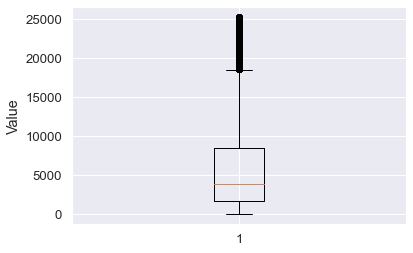

In [82]:
outlier(non_outliers['visitor'])

In [83]:
non_outliers.describe()

,visitor
count,3586.000000
mean,6098.088399
std,5901.432713
min,2.000000
25%,1692.250000
50%,3909.000000
75%,8441.000000
max,25286.000000


In [84]:
q1 = np.percentile(non_outliers['visitor'], 25)
q3 = np.percentile(non_outliers['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1692.25 q3: 8441.0


In [85]:
df = pd.read_csv('assets/output/preprocessedDataset.csv')

In [86]:
df.describe()

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,...,wind direction_median_14.0,wind direction_median_15.0,wind direction_median_16.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_7.0
count,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,...,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,-7.138248e-15,1.238808e-15,2.000144e-16,5.201722e-15,-7.660848e-16,-4.705030e-16,-1.886339e-16,1.538183e-16,5.039418e-16,-8.525479e-17,...,0.125791,0.013161,0.000253,0.142749,0.143002,0.143508,0.143255,0.143002,0.142242,0.142242
std,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,...,0.331656,0.113979,0.015909,0.349861,0.350119,0.350634,0.350377,0.350119,0.349343,0.349343
min,-1.801471e+00,-1.237522e+00,-1.312773e+00,-1.277592e+00,-2.526543e+00,-1.772178e+00,-2.079799e+00,-2.010290e+00,-5.563445e-01,-1.673174e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.719192e-01,-6.126674e-01,-6.633193e-01,-5.399546e-01,-7.959969e-01,-6.225089e-01,-6.489875e-01,-8.068656e-01,-4.137185e-01,-6.875976e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.071434e-01,-1.960979e-01,-2.404192e-01,-1.711359e-01,-2.191482e-01,-3.925751e-01,-2.281607e-01,-2.051537e-01,-4.137185e-01,-1.750976e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.576323e-01,4.287562e-01,3.486203e-01,1.976828e-01,3.577005e-01,2.972264e-01,3.441638e-01,3.965583e-01,-1.284665e-01,5.739408e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.364493e+00,1.313412e+01,7.190540e+00,7.205238e+00,1.016413e+01,7.425175e+00,6.774397e+00,6.413678e+00,9.427474e+00,5.225863e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
df_temp = df.drop('date', axis=1)

In [88]:
df_temp['visitor']

0       11483
1       14012
2       58660
3       38961
4       34852
        ...  
3946     2236
3947      925
3948      757
3949     2013
3950      628
Name: visitor, Length: 3951, dtype: int64

In [89]:
# df_temp['visitor'] = df_temp['visitor'].str.replace(',', '')
# df_temp['visitor'] = df_temp['visitor'].astype(int)

(array([2.992e+03, 5.250e+02, 2.460e+02, 1.050e+02, 5.600e+01, 2.000e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([2.00000e+00, 1.15020e+04, 2.30020e+04, 3.45020e+04, 4.60020e+04,
        5.75020e+04, 6.90020e+04, 8.05020e+04, 9.20020e+04, 1.03502e+05,
        1.15002e+05]),
 <BarContainer object of 10 artists>)

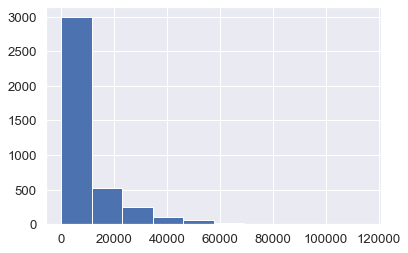

In [90]:
plt.hist(df_temp['visitor'])

In [91]:
df_temp

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,...,wind direction_median_14.0,wind direction_median_15.0,wind direction_median_16.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_7.0
0,-0.107143,-0.612667,-0.466973,-0.539955,-1.372846,-0.162641,-0.531156,-0.405724,-0.413718,0.061441,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.671919,0.220472,-0.225316,-0.171136,-1.949694,-0.852443,-1.052981,-0.806866,-0.413718,1.007595,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.457632,0.220472,0.152274,0.197683,-0.795997,-0.852443,-0.749986,-0.806866,-0.413718,1.007595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.457632,0.220472,0.454345,0.566501,-0.795997,-0.622509,-0.716320,-0.606295,-0.413718,0.495095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.022408,0.428756,0.665795,0.566501,-0.795997,-0.622509,-0.665821,-0.405724,-0.413718,0.731633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1.474229,1.261895,1.385937,1.322580,0.300016,0.872061,0.832995,0.757585,-0.185517,-0.616636,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3947,1.248318,1.178581,1.345137,1.359462,0.300016,0.918048,0.866313,0.918042,-0.356668,-0.750675,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3948,1.135363,1.386866,1.431959,1.525430,0.415385,1.285942,1.152610,1.138670,-0.014366,-0.750675,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3949,1.022408,2.395890,1.509582,1.078750,0.101323,1.676829,1.017113,0.663986,0.331106,-0.508004,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


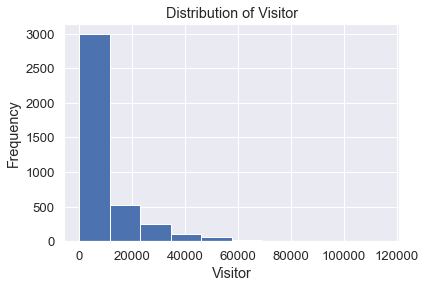

In [92]:
plt.hist(df['visitor'], bins=10)
plt.xlabel('Visitor')
plt.ylabel('Frequency')
plt.title('Distribution of Visitor')
plt.show()

In [93]:
df_temp['visitor'].sort_values()

1933         2
2912         2
2913         7
822          9
1922        11
         ...  
192      70880
1985     86100
581      96434
96       96434
922     115002
Name: visitor, Length: 3951, dtype: int64

In [94]:
df_temp['visitor'].sort_values(ascending=False)

922     115002
96       96434
581      96434
1985     86100
192      70880
         ...  
1922        11
822          9
2913         7
1933         2
2912         2
Name: visitor, Length: 3951, dtype: int64

In [95]:
df_temp['visitor'].describe()

count      3951.000000
mean       9122.186029
std       11653.034037
min           2.000000
25%        1840.000000
50%        4619.000000
75%       11280.500000
max      115002.000000
Name: visitor, dtype: float64

In [96]:
df_temp.corr()['visitor']

sulfur_dioxide_min      -0.025192
sulfur_dioxide_max       0.010920
sulfur_dioxide_mean     -0.011098
sulfur_dioxide_median   -0.013694
carbon_monoxide_min     -0.096105
                           ...   
weekday_3.0             -0.118335
weekday_4.0             -0.096134
weekday_5.0             -0.057807
weekday_6.0              0.251182
weekday_7.0              0.277308
Name: visitor, Length: 120, dtype: float64

In [97]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # 히트맵 크기 조정
# plt.figure(figsize=(32, 24))
# sns.set(font_scale=1.2)
#
# # 히트맵 그리기
# correlation_matrix = df_temp.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#
# # x축과 y축 레이블 회전
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
#
# # 그래프 제목 설정
# plt.title('Correlation Matrix')
#
# # 그래프 출력
# plt.show()

In [98]:
# df.corr 기본 값은 pearson입니다
df_corr = df_temp.corr()

In [116]:
df_corr['visitor']

sulfur_dioxide_min      -0.025192
sulfur_dioxide_max       0.010920
sulfur_dioxide_mean     -0.011098
sulfur_dioxide_median   -0.013694
carbon_monoxide_min     -0.096105
                           ...   
weekday_3.0             -0.118335
weekday_4.0             -0.096134
weekday_5.0             -0.057807
weekday_6.0              0.251182
weekday_7.0              0.277308
Name: visitor, Length: 120, dtype: float64

## 상관도 높은 순서: 주말, 오존, 온도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> min, fine_dust -> median, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> min, wind direction -> min, skystate -> max

In [107]:
df_temp.corr(method='kendall')['visitor']

sulfur_dioxide_min      -0.094497
sulfur_dioxide_max      -0.029536
sulfur_dioxide_mean     -0.053556
sulfur_dioxide_median   -0.060373
carbon_monoxide_min     -0.083760
                           ...   
weekday_3.0             -0.098525
weekday_4.0             -0.081009
weekday_5.0             -0.038320
weekday_6.0              0.213039
weekday_7.0              0.219046
Name: visitor, Length: 120, dtype: float64

## 상관도 높은 순서: 주말, 오존, 온도, 습도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> median,
## wind direction -> min, skystate -> max

In [108]:
df_temp.corr(method='spearman')['visitor']

sulfur_dioxide_min      -0.130015
sulfur_dioxide_max      -0.044333
sulfur_dioxide_mean     -0.084241
sulfur_dioxide_median   -0.089292
carbon_monoxide_min     -0.116755
                           ...   
weekday_3.0             -0.120649
weekday_4.0             -0.099199
weekday_5.0             -0.046925
weekday_6.0              0.260876
weekday_7.0              0.268231
Name: visitor, Length: 120, dtype: float64

## 상관도 높은 순서: 오존, 온도, 습도 & 일산화탄소
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> mean med유사,
## wind direction -> min, skystate -> max

# 종합
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> med,
## wind direction -> min, skystate -> max

In [109]:
selected_feat = ['sulfur_dioxide_min', 'carbon_monoxide_max', 'ozone_max', 'nitrogen_dioxide_max', 'fine_dust_pm10_max',                 'rainfall_mean', 'probability of precipitation_min', 'humidity_min', 'highest temperature_max',                 'lowest temperature_min', 'wind speed_median', 'sky state_max', 'visitor']

In [110]:
df_selected = df[selected_feat]

In [111]:
df_selected.corr().iloc[:,-1]

sulfur_dioxide_min                 -0.025192
carbon_monoxide_max                -0.116652
ozone_max                           0.266586
nitrogen_dioxide_max                0.089203
fine_dust_pm10_max                  0.022066
rainfall_mean                      -0.041450
probability of precipitation_min    0.027192
humidity_min                        0.075751
highest temperature_max             0.172581
lowest temperature_min              0.167803
wind speed_median                  -0.055342
sky state_max                      -0.046683
visitor                             1.000000
Name: visitor, dtype: float64

In [112]:
df_selected.corr(method='kendall').iloc[:,-1]

sulfur_dioxide_min                 -0.094497
carbon_monoxide_max                -0.103963
ozone_max                           0.261936
nitrogen_dioxide_max                0.055778
fine_dust_pm10_max                  0.023323
rainfall_mean                       0.017903
probability of precipitation_min    0.048532
humidity_min                        0.091282
highest temperature_max             0.176298
lowest temperature_min              0.170754
wind speed_median                  -0.072191
sky state_max                      -0.035154
visitor                             1.000000
Name: visitor, dtype: float64

In [113]:
df_selected.corr(method='spearman').iloc[:,-1]

sulfur_dioxide_min                 -0.130015
carbon_monoxide_max                -0.155699
ozone_max                           0.393071
nitrogen_dioxide_max                0.082749
fine_dust_pm10_max                  0.034478
rainfall_mean                       0.023576
probability of precipitation_min    0.064999
humidity_min                        0.132158
highest temperature_max             0.259331
lowest temperature_min              0.249927
wind speed_median                  -0.103986
sky state_max                      -0.045371
visitor                             1.000000
Name: visitor, dtype: float64

In [117]:
abs(df_corr['visitor'])

sulfur_dioxide_min       0.025192
sulfur_dioxide_max       0.010920
sulfur_dioxide_mean      0.011098
sulfur_dioxide_median    0.013694
carbon_monoxide_min      0.096105
                           ...   
weekday_3.0              0.118335
weekday_4.0              0.096134
weekday_5.0              0.057807
weekday_6.0              0.251182
weekday_7.0              0.277308
Name: visitor, Length: 120, dtype: float64

In [118]:
abs(df_temp.corr(method='kendall')['visitor'])

sulfur_dioxide_min       0.094497
sulfur_dioxide_max       0.029536
sulfur_dioxide_mean      0.053556
sulfur_dioxide_median    0.060373
carbon_monoxide_min      0.083760
                           ...   
weekday_3.0              0.098525
weekday_4.0              0.081009
weekday_5.0              0.038320
weekday_6.0              0.213039
weekday_7.0              0.219046
Name: visitor, Length: 120, dtype: float64

In [119]:
abs(df_temp.corr(method='spearman')['visitor'])

sulfur_dioxide_min       0.130015
sulfur_dioxide_max       0.044333
sulfur_dioxide_mean      0.084241
sulfur_dioxide_median    0.089292
carbon_monoxide_min      0.116755
                           ...   
weekday_3.0              0.120649
weekday_4.0              0.099199
weekday_5.0              0.046925
weekday_6.0              0.260876
weekday_7.0              0.268231
Name: visitor, Length: 120, dtype: float64